## Regression using TensorFlow and Apache MxNet Neural Network (NN)
### Build the Neural Network using Keras - Easy and Portable across different implementations  

https://keras.io/  

### For building on TensorFlow - Use a conda_tensorflow_py36 or equivalent kernel
### For building on Apache MxNet  - Use a conda_mxnet_py36 or equivalent kernel

#### One-Hot Encode categorical features, Standardize numeric features

Objective:
1. Train a bike rental prediction model
2. NN requires one hot encoding of categorical data
3. NN also requires features to be on similar scale
4. Perform one-hot encoding of all categorical features:
    ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek', 'hour']
5. Verify model performance 

In [1]:
# https://keras.io/
# https://github.com/keras-team/keras/issues/2743
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer

# Keras Library
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [3]:
# One Hot Encode all Categorical Features
# Let's define all the categorical features
categorical_features = ['season','holiday','workingday','weather','year','month','dayofweek','hour']

# Separated day
categorical_day = ['day']

# Standardize Features
standardize_features = ['temp', 'atemp', 'humidity', 'windspeed']

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [7]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [8]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [9]:
colTransformer = ColumnTransformer([('onehot',
                                     OneHotEncoder(categories='auto',sparse=False),
                                     categorical_features),
                                    ('onehotday',
                                     OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
                                                   sparse=False),
                                     ['day']),
                                    ('standardize',
                                    StandardScaler(),standardize_features)
                                   ],
                                   remainder="passthrough")

In [10]:
colTransformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=False),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'year', 'month', 'dayofweek', 'hour'])...
                                 OneHotEncoder(categorical_features=None,
                                               categories=[[1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 1

In [11]:
X_train_encoded = colTransformer.transform(X_train)
X_validation_encoded = colTransformer.transform(X_validation)

In [12]:
print('Training Data',X_train.shape, 'OneHot Encoded',X_train_encoded.shape)
print('Val Data',X_validation.shape, 'OneHot Encoded',X_validation_encoded.shape)

Training Data (7620, 13) OneHot Encoded (7620, 92)
Val Data (3266, 13) OneHot Encoded (3266, 92)


In [13]:
X_train_encoded[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [14]:
X_validation_encoded[:1]

array([[0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

## Build Model using Keras  
Reference: https://keras.io/getting-started/sequential-model-guide/  

In [15]:
# Dimension of input data
# We need to specify number of features when configuring the first hidden layer
X_train_encoded.shape

(7620, 92)

In [16]:
model = Sequential()
# 1 hidden layer with 100 neurons with relu activation
# output layer - regression, so no activation
model.add(Dense(100, input_dim=X_train_encoded.shape[1],activation='relu'))
model.add(Dense(1,activation=None))

In [17]:
# Need to compile the model, specify the optimizer and loss function to use
# For a mean squared error regression problem
model.compile(optimizer='adam',
              loss='mse')

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
# We can optionally configure early stopping to prevent overfitting - stop when validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [20]:
history = model.fit(X_train_encoded, y_train, epochs=20, batch_size=32, 
          validation_data=(X_validation_encoded,y_validation),callbacks=[early_stopping])



Train on 7620 samples, validate on 3266 samples
Epoch 1/20
7620/7620 [==============================] - 1s 142us/step - loss: 2.9748 - val_loss: 0.5468
Epoch 2/20
7620/7620 [==============================] - 0s 64us/step - loss: 0.4221 - val_loss: 0.3458
Epoch 3/20
7620/7620 [==============================] - 0s 63us/step - loss: 0.3051 - val_loss: 0.2771
Epoch 4/20
7620/7620 [==============================] - 1s 66us/step - loss: 0.2104 - val_loss: 0.1708
Epoch 5/20
7620/7620 [==============================] - 0s 64us/step - loss: 0.1268 - val_loss: 0.1150
Epoch 6/20
7620/7620 [==============================] - 1s 66us/step - loss: 0.1008 - val_loss: 0.1020
Epoch 7/20
7620/7620 [==============================] - 0s 64us/step - loss: 0.0911 - val_loss: 0.0951
Epoch 8/20
7620/7620 [==============================] - 0s 65us/step - loss: 0.0864 - val_loss: 0.1030
Epoch 9/20
7620/7620 [==============================] - 0s 63us/step - loss: 0.0831 - val_loss: 0.0925
Epoch 10/20
7620/7620 

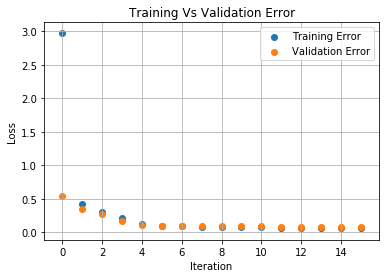

In [21]:
plt.scatter(x=history.epoch,y=history.history['loss'],label='Training Error')
plt.scatter(x=history.epoch,y=history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [22]:
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [23]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [24]:
result = model.predict(X_validation_encoded)

In [25]:
result[:5]

array([[6.0870423],
       [5.987206 ],
       [1.2002574],
       [3.6778917],
       [3.8574672]], dtype=float32)

In [26]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [27]:
df['count_predicted'] = result

In [28]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,6.087042
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.987206
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.200257
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,3.677892
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,3.857467


In [29]:
df['count_predicted'].describe()

count    3266.000000
mean        4.555104
std         1.376245
min         0.373345
25%         3.714897
50%         4.927431
75%         5.583823
max         6.835466
Name: count_predicted, dtype: float64

In [30]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

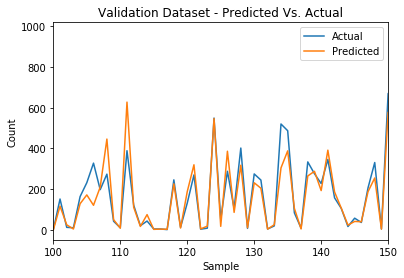

In [31]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

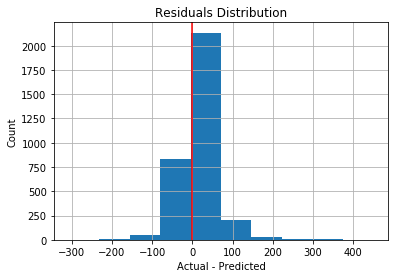

In [32]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [33]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.61
 Over  Estimation: 0.39


In [34]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

RMSE: 47.11


In [35]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [36]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.29


In [37]:
# Optional Test Data
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [38]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [39]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [40]:
# Transform data first with column transformer
result = model.predict(colTransformer.transform(X_test))

In [41]:
result[:5]

array([[1.9465466],
       [1.6528357],
       [1.0643601],
       [0.7702359],
       [0.7707273]], dtype=float32)

In [42]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [43]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,6.004457
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,4.221766
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,1.898983
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.160276
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.161338


In [44]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [45]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
96,2011-01-24 03:00:00,1,0,1,1,1.64,1.515,45,16.9979,2011,1,24,0,3,-0.102897
97,2011-01-24 04:00:00,1,0,1,1,0.82,3.030,48,8.9981,2011,1,24,0,4,-0.020598


In [46]:
df_test['count'] = df_test['count'].map(adjust_count)

In [47]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [48]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)